We’ll see the magic of CLIP through inference, where the model can recognize and relate text with images without having ever seen the classification labels before — a technique known as zero-shot learning.

# 🚀 What You’ll Learn Today: How to load a pretrained CLIP model via Hugging Face

* Encode both image and text prompts into embeddings
* Perform zero-shot classification
* Visualize cosine similarity scores
* Try a mini image-to-text matching experiment

## 🛠️ Step 1: Setup – Load the CLIP Model

We’ll use Hugging Face's transformers and openai/clip-vit-base-patch32 checkpoint, which is lightweight and beginner-friendly.

In [1]:
!pip install transformers torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found existing installation: nvidia-curand-cu12 10.3.10.19
    Uninstalling nvidia-curand-cu12-10.3.10.19:
      Successfully uninstalled nvidia-curand-cu12-10.3.10.19
  Attemp

In [2]:
from transformers import CLIPProcessor, CLIPModel
import torch
from PIL import Image
import requests

# Load model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

2025-06-13 12:56:13.136252: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749819373.331522      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749819373.387152      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

## 🖼️ Step 2: Load Image and Define Text Prompts

We’ll use a sample image and a few natural language prompts that describe possible contents.

In [3]:
# load image 
image_url = "https://images.pexels.com/photos/1108099/pexels-photo-1108099.jpeg"
image = Image.open(requests.get(image_url, stream=True).raw)

#Define possible labels
text_prompts = ["a photo of a puppy", "a photo of a pizza", "a picture of a beach", "a dog running", "an airplane flying"]

## 🧪 Step 3: Inference – Encode and Predict


The processor helps tokenize both image and text and returns inputs ready for the model.

In [4]:
# Preprocess
inputs = processor(text=text_prompts, images=image, return_tensors="pt", padding=True)

# Get image and text features
outputs = model(**inputs)
image_features = outputs.image_embeds
text_features = outputs.text_embeds

🎉 CLIP believes this image is 80% likely to be a dog — even though it’s never seen these labels before!

--- Test Image ---


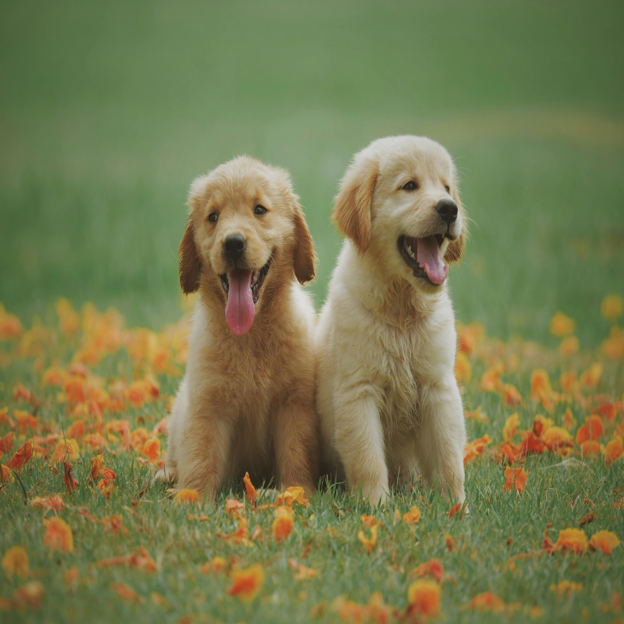


--- Predicted Output ---
Predicted Class: 'a photo of a puppy'
Confidence: 90.05%

--- All Probabilities ---
  'a photo of a puppy': 90.05%
  'a photo of a pizza': 0.02%
  'a picture of a beach': 0.02%
  'a dog running': 9.89%
  'an airplane flying': 0.01%


In [5]:
import torch
from PIL import Image
import requests
import numpy as np
from transformers import CLIPProcessor, CLIPModel
from IPython.display import display



# --- Inference ---
with torch.no_grad():
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image  # this is the cosine similarity
    probs = logits_per_image.softmax(dim=1)      # convert to probabilities

# --- Display the image ---
print("--- Test Image ---")
image_display = image.resize((624, 624))
display(image_display)

# --- Show Predicted Output ---
predicted_index = torch.argmax(probs).item()
predicted_label = text_prompts[predicted_index]
predicted_probability = probs[0, predicted_index].item() * 100

print(f"\n--- Predicted Output ---")
print(f"Predicted Class: '{predicted_label}'")
print(f"Confidence: {predicted_probability:.2f}%")

print("\n--- All Probabilities ---")
for i, label in enumerate(text_prompts):
    print(f"  '{label}': {probs[0, i].item()*100:.2f}%")


## 📊 Step 4: Visualizing Cosine Similarities

Want a deeper look at what CLIP is doing? Let’s visualize the raw similarity scores between the image and each text label.

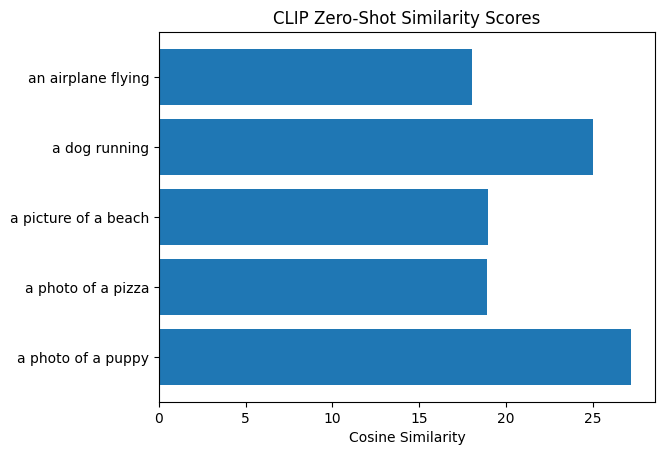

In [6]:
import matplotlib.pyplot as plt

plt.barh(text_prompts, logits_per_image[0].detach().numpy())
plt.xlabel("Cosine Similarity")
plt.title("CLIP Zero-Shot Similarity Scores")
plt.show()


## 🔍 Bonus: Batch Similarity Matching

Try encoding multiple images and match them with multiple texts using cosine similarity.

Error loading image from https://images.pexels.com/photos/957024/pexels-photo-957024.jpeg?auto=compress&cs=tinysrgb&h=512: cannot identify image file <_io.BytesIO object at 0x78f2209ed170>


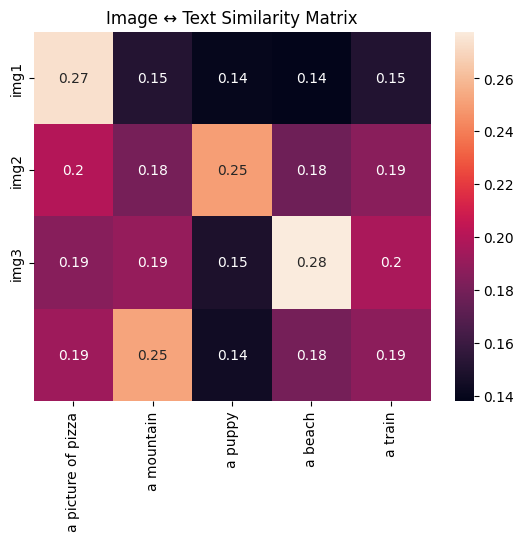

In [7]:
from sklearn.metrics.pairwise import cosine_similarity

import requests
from PIL import Image
from io import BytesIO

# Valid sample image URLs (Pexels allows hotlinking in most cases)
image_urls = [
    "https://images.pexels.com/photos/315755/pexels-photo-315755.jpeg?auto=compress&cs=tinysrgb&h=512",
    "https://images.pexels.com/photos/957024/pexels-photo-957024.jpeg?auto=compress&cs=tinysrgb&h=512",
    "https://images.pexels.com/photos/1805164/pexels-photo-1805164.jpeg?auto=compress&cs=tinysrgb&h=512",
    "https://images.pexels.com/photos/457882/pexels-photo-457882.jpeg?auto=compress&cs=tinysrgb&h=512",
    "https://images.pexels.com/photos/618833/pexels-photo-618833.jpeg?auto=compress&cs=tinysrgb&h=512"
]

headers = {
    "User-Agent": "Mozilla/5.0"
}

images = []

for url in image_urls:
    try:
        response = requests.get(url, headers=headers)
        img = Image.open(BytesIO(response.content)).convert("RGB")
        images.append(img)
    except Exception as e:
        print(f"Error loading image from {url}: {e}")
# Encode multiple text prompts
texts = ["a picture of pizza", "a mountain", "a puppy", "a beach", "a train"]


# Encode all
inputs = processor(text=texts, images=images, return_tensors="pt", padding=True)
outputs = model(**inputs)

# Cosine similarity matrix
similarity = cosine_similarity(outputs.image_embeds.detach().numpy(), outputs.text_embeds.detach().numpy())

import seaborn as sns
sns.heatmap(similarity, annot=True, xticklabels=texts, yticklabels=["img1", "img2", "img3"])
plt.title("Image ↔ Text Similarity Matrix")
plt.show()
